In [3]:
# autoreload after code has changed
%load_ext autoreload
%autoreload 2

In [4]:
import os

# move into the correct dirrectory, e.g. move up one directory level iif this cell is run for the first time
try:
    a = first_time
except NameError:
    print("Running first time, moving up one dir level")
    os.chdir('..')  # Move up one directory level to the root directory of project
    first_time = False

print("This path should be the root directory of the project: ", os.getcwd())
    

Running first time, moving up one dir level
This path should be the root directory of the project:  /home/daniels/Documents/uni/ADLR/tum-adlr-02


# Reconstrution Network

In [5]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from data.reconstruction_dataset import *

### Dataset
Creating the dataset object and applzing transformations to the data.

In [6]:
csv_file = './datasets/2D_shapes/annotations.csv'
root_dir = './datasets/2D_shapes'
composed = transforms.Compose([RandomOrientation(),
                               ToTensor()])

dataset = ReconstructionDataset(csv_file=csv_file,
                                root_dir=root_dir,
                                transform=composed)

Examplary data pairs:

torch.Size([1, 256, 256])


<Figure size 640x480 with 0 Axes>

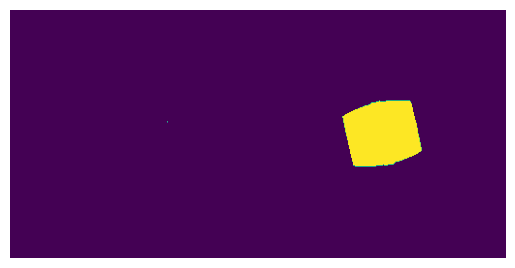

In [7]:
example_data = dataset[0]
print(example_data['image'].shape)
plt.figure()
show_datapair(example_data['image'], example_data['label'])
plt.show()

### Dataloader
Creating a dataloader based on the dataset for batch processing.

TODO: Remove spacing in figure.

torch.Size([250, 250])


<Figure size 250x4000 with 0 Axes>

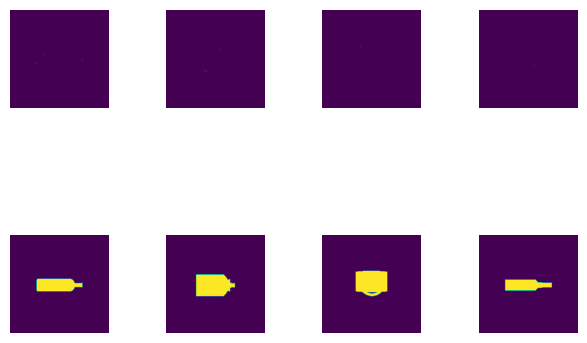

In [10]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)

show_datapair_batch(next(iter(dataloader)))

print(next(iter(dataloader)).shapoe
